* 데이터 양이 너무 많아서 코드만 올리기!
* 데이터는 서울특별시 공공자전거 대여이력 정보를 검색하여 2024년 1분기 정보만 업로드하기!

* Q1. 일(day)별 자전거 이용건수는 어떻게 될까?
* Q2. 대여시간대별, 요일별 자전거 이용건수는 어떻게 될까?
* Q3. 주말, 평일 이용건수는 어떻게 될까?
* Q4. 인기명소는 어디일까?

In [1]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# 데이터 불러오기, 데이터 병합

import pandas as pd

In [3]:
pd.read_csv('files\서울특별시 공공자전거 대여이력 정보_2401.csv',encoding='cp949')

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분
0,SPB-46712,2024-01-01 00:04:10,4804,동서울농협 앞,0,2024-01-01 00:05:13,01416,상봉역 3번출구,0,1,0.00,2002,M,내국인,ST-2630,ST-850,일반자전거
1,SPB-35089,2024-01-01 00:00:10,4169,신대방삼거리,0,2024-01-01 00:06:23,00251,서울지방병무청 버스정류장,0,6,1147.58,1993,NaN,내국인,ST-2654,ST-299,일반자전거
2,SPB-36386,2024-01-01 00:03:13,540,군자역 7번출구 베스트샵 앞,0,2024-01-01 00:06:33,03509,세종사이버대학교,0,3,642.13,2004,F,내국인,ST-253,ST-1194,일반자전거
3,SPB-61278,2024-01-01 00:02:42,1139,용문사 버스정류장,0,2024-01-01 00:07:24,00701,목동사거리 부근,0,4,830.00,\N,M,내국인,ST-533,ST-309,일반자전거
4,SPB-36848,2024-01-01 00:03:02,3416,동묘앞역 6번출구,0,2024-01-01 00:07:33,00346,맥스타일 앞,0,4,791.08,1995,M,내국인,ST-1813,ST-162,일반자전거
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053888,SPB-36618,2024-01-31 17:34:02,746,목동2단지 상가,0,2024-02-01 14:31:36,04541,갈산문화예술센터,0,1257,3504.27,2008,F,내국인,ST-1017,ST-3089,일반자전거
2053889,SPB-41072,2024-01-31 23:27:27,491,월드컵파크 4단지,0,2024-02-01 14:34:10,\N,\N,\N,110,8813.00,1991,F,내국인,ST-2150,\N,일반자전거
2053890,SPB-47711,2024-01-31 20:36:11,3683,KT&G강동지사,0,2024-02-01 17:49:19,01050,둔촌역 3번 출입구,0,1273,1973.32,2003,F,내국인,ST-2751,ST-1420,일반자전거
2053891,SPB-51606,2024-01-31 22:37:35,1029,성내어울터,0,2024-02-02 13:17:53,\N,\N,\N,870,2049.00,2006,M,내국인,ST-1046,\N,일반자전거


In [4]:
# 세 개 한꺼번에 불러오기: os 말고 다른 방법으로!

bikes_temp={}

for i in range(1,4):
    bikes_temp[i]=pd.read_csv(f'files\서울특별시 공공자전거 대여이력 정보_240{i}.csv',encoding='cp949')

In [5]:
for i in range(1,4):
    print(bikes_temp[i].shape)

(2053893, 17)
(2101129, 17)
(3250056, 17)


In [6]:
for i in range(1,4):
    print(bikes_temp[i].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2053893 entries, 0 to 2053892
Data columns (total 17 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     object 
 9   이용시간(분)   int64  
 10  이용거리(M)   float64
 11  생년        object 
 12  성별        object 
 13  이용자종류     object 
 14  대여대여소ID   object 
 15  반납대여소ID   object 
 16  자전거구분     object 
dtypes: float64(1), int64(3), object(13)
memory usage: 266.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2101129 entries, 0 to 2101128
Data columns (total 17 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     object 
 9   이용시간(분)  

In [7]:
# 세 개를 행로 병합하기

bikes=pd.concat(bikes_temp)

In [8]:
bikes # bikes_temp의 key가 인덱스로 설정됨

자전거번호                 대여일시  대여 대여소번호          대여 대여소명  대여거치대  \
1 0        SPB-46712  2024-01-01 00:04:10      4804          동서울농협 앞      0   
  1        SPB-35089  2024-01-01 00:00:10      4169           신대방삼거리      0   
  2        SPB-36386  2024-01-01 00:03:13       540  군자역 7번출구 베스트샵 앞      0   
  3        SPB-61278  2024-01-01 00:02:42      1139        용문사 버스정류장      0   
  4        SPB-36848  2024-01-01 00:03:02      3416        동묘앞역 6번출구      0   
...              ...                  ...       ...              ...    ...   
3 3250051  SPB-37616  2024-03-31 22:29:29      1009   천호역4번출구(현대백화점)      0   
  3250052  SPB-65871  2024-03-31 15:51:11      4217       한강공원 망원나들목      0   
  3250053  SPB-60717  2024-03-31 20:02:02      2604       풍납토성 서성벽터A      0   
  3250054  SPB-57241  2024-03-31 19:32:35      3508            화양사거리      0   
  3250055  SPB-41073  2024-03-31 08:07:54       202           국민일보 앞      0   

                          반납일시 반납대여소번호         반납대여소명 반납거치대  이용시간(분)  \
1 0        2024-01-01 00:05:13   01416       상봉역 3번출구     0        1   
  1        2024-01-01 00:06:23   00251  서울지방병무청 버스정류장     0        6   
  2        2024-01-01 00:06:33   03509       세종사이버대학교     0        3   
  3        2024-01-01 00:07:24   00701       목동사거리 부근     0        4   
  4        2024-01-01 00:07:33   00346         맥스타일 앞     0        4   
...                        ...     ...            ...   ...      ...   
3 3250051  2024-04-02 13:01:23      \N             \N    \N      870   
  3250052  2024-04-02 13:01:44      \N             \N    \N      870   
  3250053  2024-04-02 13:02:07      \N             \N    \N      870   
  3250054  2024-04-02 13:02:23      \N             \N    \N      870   
  3250055  2024-04-02 13:03:23      \N             \N    \N      870   

            이용거리(M)    생년   성별 이용자종류  대여대여소ID  반납대여소ID  자전거구분  
1 0            0.00  2002    M   내국인  ST-2630   ST-850  일반자전거  
  1         1147.58  1993  NaN   내국인  ST-2654   ST-299  일반자전거  
  2          642.13  2004    F   내국인   ST-253  ST-1194  일반자전거  
  3          830.00    \N    M   내국인   ST-533   ST-309  일반자전거  
  4          791.08  1995    M   내국인  ST-1813   ST-162  일반자전거  
...             ...   ...  ...   ...      ...      ...    ...  
3 3250051  10268.00    \N   \N   비회원   ST-493       \N  일반자전거  
  3250052   5210.00    \N   \N   비회원  ST-2905       \N  일반자전거  
  3250053   5009.00  1995    M   내국인  ST-1627       \N  일반자전거  
  3250054  24110.00  2005    M   내국인  ST-1193       \N  일반자전거  
  3250055   1220.00  1985    M   내국인    ST-47       \N  일반자전거  

[7405078 rows x 17 columns]

In [9]:
bikes.shape

(7405078, 17)

In [10]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7405078 entries, (np.int64(1), np.int64(0)) to (np.int64(3), np.int64(3250055))
Data columns (total 17 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     object 
 9   이용시간(분)   int64  
 10  이용거리(M)   float64
 11  생년        object 
 12  성별        object 
 13  이용자종류     object 
 14  대여대여소ID   object 
 15  반납대여소ID   object 
 16  자전거구분     object 
dtypes: float64(1), int64(3), object(13)
memory usage: 1.1+ GB


In [11]:
bikes.index

MultiIndex([(1,       0),
            (1,       1),
            (1,       2),
            (1,       3),
            (1,       4),
            (1,       5),
            (1,       6),
            (1,       7),
            (1,       8),
            (1,       9),
            ...
            (3, 3250046),
            (3, 3250047),
            (3, 3250048),
            (3, 3250049),
            (3, 3250050),
            (3, 3250051),
            (3, 3250052),
            (3, 3250053),
            (3, 3250054),
            (3, 3250055)],
           length=7405078)

In [12]:
bikes=pd.concat(bikes_temp,ignore_index=True)
bikes

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분
0,SPB-46712,2024-01-01 00:04:10,4804,동서울농협 앞,0,2024-01-01 00:05:13,01416,상봉역 3번출구,0,1,0.00,2002,M,내국인,ST-2630,ST-850,일반자전거
1,SPB-35089,2024-01-01 00:00:10,4169,신대방삼거리,0,2024-01-01 00:06:23,00251,서울지방병무청 버스정류장,0,6,1147.58,1993,NaN,내국인,ST-2654,ST-299,일반자전거
2,SPB-36386,2024-01-01 00:03:13,540,군자역 7번출구 베스트샵 앞,0,2024-01-01 00:06:33,03509,세종사이버대학교,0,3,642.13,2004,F,내국인,ST-253,ST-1194,일반자전거
3,SPB-61278,2024-01-01 00:02:42,1139,용문사 버스정류장,0,2024-01-01 00:07:24,00701,목동사거리 부근,0,4,830.00,\N,M,내국인,ST-533,ST-309,일반자전거
4,SPB-36848,2024-01-01 00:03:02,3416,동묘앞역 6번출구,0,2024-01-01 00:07:33,00346,맥스타일 앞,0,4,791.08,1995,M,내국인,ST-1813,ST-162,일반자전거
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405073,SPB-37616,2024-03-31 22:29:29,1009,천호역4번출구(현대백화점),0,2024-04-02 13:01:23,\N,\N,\N,870,10268.00,\N,\N,비회원,ST-493,\N,일반자전거
7405074,SPB-65871,2024-03-31 15:51:11,4217,한강공원 망원나들목,0,2024-04-02 13:01:44,\N,\N,\N,870,5210.00,\N,\N,비회원,ST-2905,\N,일반자전거
7405075,SPB-60717,2024-03-31 20:02:02,2604,풍납토성 서성벽터A,0,2024-04-02 13:02:07,\N,\N,\N,870,5009.00,1995,M,내국인,ST-1627,\N,일반자전거
7405076,SPB-57241,2024-03-31 19:32:35,3508,화양사거리,0,2024-04-02 13:02:23,\N,\N,\N,870,24110.00,2005,M,내국인,ST-1193,\N,일반자전거


In [13]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7405078 entries, 0 to 7405077
Data columns (total 17 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     object 
 9   이용시간(분)   int64  
 10  이용거리(M)   float64
 11  생년        object 
 12  성별        object 
 13  이용자종류     object 
 14  대여대여소ID   object 
 15  반납대여소ID   object 
 16  자전거구분     object 
dtypes: float64(1), int64(3), object(13)
memory usage: 960.4+ MB


* 날짜 데이터로 변경하는 방법: pd.to_datetime(변수명)
* dt 액세서: 날짜 형식으로 돼 있어야 가능
    - 변수명.dt.year
    - 변수명.dt.month
    - 변수명.dt.day
    - 변수명.dt.weekday: 요일. 단 숫자로 0(월)~6(일)까지 만들어짐
    - 변수명.dt.hour: 시간

In [14]:
# Q1. 일(day)별 자전거 이용건수는 어떻게 될까?
# Q2. 대여시간대별, 요일별 자전거 이용건수는 어떻게 될까?
# Q3. 주말, 평일 이용건수는 어떻게 될까?

# 대여일시를 날짜 데이터로 바꾸기: 대여일, 월(月), 일자, 요일, 대여시간대, 주말구분 column 추가

bikes['대여일']=pd.to_datetime(bikes['대여일시'])
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7405078 entries, 0 to 7405077
Data columns (total 18 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      object        
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   대여거치대     int64         
 5   반납일시      object        
 6   반납대여소번호   object        
 7   반납대여소명    object        
 8   반납거치대     object        
 9   이용시간(분)   int64         
 10  이용거리(M)   float64       
 11  생년        object        
 12  성별        object        
 13  이용자종류     object        
 14  대여대여소ID   object        
 15  반납대여소ID   object        
 16  자전거구분     object        
 17  대여일       datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(13)
memory usage: 1016.9+ MB


In [15]:
bikes

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분,대여일
0,SPB-46712,2024-01-01 00:04:10,4804,동서울농협 앞,0,2024-01-01 00:05:13,01416,상봉역 3번출구,0,1,0.00,2002,M,내국인,ST-2630,ST-850,일반자전거,2024-01-01 00:04:10
1,SPB-35089,2024-01-01 00:00:10,4169,신대방삼거리,0,2024-01-01 00:06:23,00251,서울지방병무청 버스정류장,0,6,1147.58,1993,NaN,내국인,ST-2654,ST-299,일반자전거,2024-01-01 00:00:10
2,SPB-36386,2024-01-01 00:03:13,540,군자역 7번출구 베스트샵 앞,0,2024-01-01 00:06:33,03509,세종사이버대학교,0,3,642.13,2004,F,내국인,ST-253,ST-1194,일반자전거,2024-01-01 00:03:13
3,SPB-61278,2024-01-01 00:02:42,1139,용문사 버스정류장,0,2024-01-01 00:07:24,00701,목동사거리 부근,0,4,830.00,\N,M,내국인,ST-533,ST-309,일반자전거,2024-01-01 00:02:42
4,SPB-36848,2024-01-01 00:03:02,3416,동묘앞역 6번출구,0,2024-01-01 00:07:33,00346,맥스타일 앞,0,4,791.08,1995,M,내국인,ST-1813,ST-162,일반자전거,2024-01-01 00:03:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405073,SPB-37616,2024-03-31 22:29:29,1009,천호역4번출구(현대백화점),0,2024-04-02 13:01:23,\N,\N,\N,870,10268.00,\N,\N,비회원,ST-493,\N,일반자전거,2024-03-31 22:29:29
7405074,SPB-65871,2024-03-31 15:51:11,4217,한강공원 망원나들목,0,2024-04-02 13:01:44,\N,\N,\N,870,5210.00,\N,\N,비회원,ST-2905,\N,일반자전거,2024-03-31 15:51:11
7405075,SPB-60717,2024-03-31 20:02:02,2604,풍납토성 서성벽터A,0,2024-04-02 13:02:07,\N,\N,\N,870,5009.00,1995,M,내국인,ST-1627,\N,일반자전거,2024-03-31 20:02:02
7405076,SPB-57241,2024-03-31 19:32:35,3508,화양사거리,0,2024-04-02 13:02:23,\N,\N,\N,870,24110.00,2005,M,내국인,ST-1193,\N,일반자전거,2024-03-31 19:32:35


In [16]:
bikes['대여월']=bikes['대여일'].dt.month
bikes['대여일자']=bikes['대여일'].dt.day
bikes['대여시간대']=bikes['대여일'].dt.hour
bikes

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,생년,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분,대여일,대여월,대여일자,대여시간대
0,SPB-46712,2024-01-01 00:04:10,4804,동서울농협 앞,0,2024-01-01 00:05:13,01416,상봉역 3번출구,0,1,...,2002,M,내국인,ST-2630,ST-850,일반자전거,2024-01-01 00:04:10,1,1,0
1,SPB-35089,2024-01-01 00:00:10,4169,신대방삼거리,0,2024-01-01 00:06:23,00251,서울지방병무청 버스정류장,0,6,...,1993,NaN,내국인,ST-2654,ST-299,일반자전거,2024-01-01 00:00:10,1,1,0
2,SPB-36386,2024-01-01 00:03:13,540,군자역 7번출구 베스트샵 앞,0,2024-01-01 00:06:33,03509,세종사이버대학교,0,3,...,2004,F,내국인,ST-253,ST-1194,일반자전거,2024-01-01 00:03:13,1,1,0
3,SPB-61278,2024-01-01 00:02:42,1139,용문사 버스정류장,0,2024-01-01 00:07:24,00701,목동사거리 부근,0,4,...,\N,M,내국인,ST-533,ST-309,일반자전거,2024-01-01 00:02:42,1,1,0
4,SPB-36848,2024-01-01 00:03:02,3416,동묘앞역 6번출구,0,2024-01-01 00:07:33,00346,맥스타일 앞,0,4,...,1995,M,내국인,ST-1813,ST-162,일반자전거,2024-01-01 00:03:02,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405073,SPB-37616,2024-03-31 22:29:29,1009,천호역4번출구(현대백화점),0,2024-04-02 13:01:23,\N,\N,\N,870,...,\N,\N,비회원,ST-493,\N,일반자전거,2024-03-31 22:29:29,3,31,22
7405074,SPB-65871,2024-03-31 15:51:11,4217,한강공원 망원나들목,0,2024-04-02 13:01:44,\N,\N,\N,870,...,\N,\N,비회원,ST-2905,\N,일반자전거,2024-03-31 15:51:11,3,31,15
7405075,SPB-60717,2024-03-31 20:02:02,2604,풍납토성 서성벽터A,0,2024-04-02 13:02:07,\N,\N,\N,870,...,1995,M,내국인,ST-1627,\N,일반자전거,2024-03-31 20:02:02,3,31,20
7405076,SPB-57241,2024-03-31 19:32:35,3508,화양사거리,0,2024-04-02 13:02:23,\N,\N,\N,870,...,2005,M,내국인,ST-1193,\N,일반자전거,2024-03-31 19:32:35,3,31,19


In [17]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7405078 entries, 0 to 7405077
Data columns (total 21 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      object        
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   대여거치대     int64         
 5   반납일시      object        
 6   반납대여소번호   object        
 7   반납대여소명    object        
 8   반납거치대     object        
 9   이용시간(분)   int64         
 10  이용거리(M)   float64       
 11  생년        object        
 12  성별        object        
 13  이용자종류     object        
 14  대여대여소ID   object        
 15  반납대여소ID   object        
 16  자전거구분     object        
 17  대여일       datetime64[ns]
 18  대여월       int32         
 19  대여일자      int32         
 20  대여시간대     int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(3), object(13)
memory usage: 1.1+ GB


In [18]:
bikes['대여요일_n']=bikes['대여일'].dt.weekday
bikes['대여요일_n'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

In [19]:
# 각각 몇 개일까?

bikes['대여요일_n'].value_counts()

대여요일_n
2    1173864
3    1147832
4    1146668
1    1088280
5     987407
0     977123
6     883904
Name: count, dtype: int64

In [20]:
bikes['대여요일_n'].value_counts().sort_index()

대여요일_n
0     977123
1    1088280
2    1173864
3    1147832
4    1146668
5     987407
6     883904
Name: count, dtype: int64

In [21]:
bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분,대여일,대여월,대여일자,대여시간대,대여요일_n
0,SPB-46712,2024-01-01 00:04:10,4804,동서울농협 앞,0,2024-01-01 00:05:13,01416,상봉역 3번출구,0,1,...,M,내국인,ST-2630,ST-850,일반자전거,2024-01-01 00:04:10,1,1,0,0
1,SPB-35089,2024-01-01 00:00:10,4169,신대방삼거리,0,2024-01-01 00:06:23,00251,서울지방병무청 버스정류장,0,6,...,NaN,내국인,ST-2654,ST-299,일반자전거,2024-01-01 00:00:10,1,1,0,0
2,SPB-36386,2024-01-01 00:03:13,540,군자역 7번출구 베스트샵 앞,0,2024-01-01 00:06:33,03509,세종사이버대학교,0,3,...,F,내국인,ST-253,ST-1194,일반자전거,2024-01-01 00:03:13,1,1,0,0
3,SPB-61278,2024-01-01 00:02:42,1139,용문사 버스정류장,0,2024-01-01 00:07:24,00701,목동사거리 부근,0,4,...,M,내국인,ST-533,ST-309,일반자전거,2024-01-01 00:02:42,1,1,0,0
4,SPB-36848,2024-01-01 00:03:02,3416,동묘앞역 6번출구,0,2024-01-01 00:07:33,00346,맥스타일 앞,0,4,...,M,내국인,ST-1813,ST-162,일반자전거,2024-01-01 00:03:02,1,1,0,0


In [22]:
# 요일을 요일로 보이게끔!: (lambda, )map 함수 이용하여!

weekdays={0:'월',
          1:'화',
          2:'수',
          3:'목',
          4:'금',
          5:'토',
          6:'일'}

bikes['대여요일']=bikes['대여요일_n'].map(weekdays)
bikes['대여요일'].unique()

array(['월', '화', '수', '목', '금', '토', '일'], dtype=object)

In [23]:
bikes['대여요일'].value_counts()

대여요일
수    1173864
목    1147832
금    1146668
화    1088280
토     987407
월     977123
일     883904
Name: count, dtype: int64

In [24]:
bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,이용자종류,대여대여소ID,반납대여소ID,자전거구분,대여일,대여월,대여일자,대여시간대,대여요일_n,대여요일
0,SPB-46712,2024-01-01 00:04:10,4804,동서울농협 앞,0,2024-01-01 00:05:13,01416,상봉역 3번출구,0,1,...,내국인,ST-2630,ST-850,일반자전거,2024-01-01 00:04:10,1,1,0,0,월
1,SPB-35089,2024-01-01 00:00:10,4169,신대방삼거리,0,2024-01-01 00:06:23,00251,서울지방병무청 버스정류장,0,6,...,내국인,ST-2654,ST-299,일반자전거,2024-01-01 00:00:10,1,1,0,0,월
2,SPB-36386,2024-01-01 00:03:13,540,군자역 7번출구 베스트샵 앞,0,2024-01-01 00:06:33,03509,세종사이버대학교,0,3,...,내국인,ST-253,ST-1194,일반자전거,2024-01-01 00:03:13,1,1,0,0,월
3,SPB-61278,2024-01-01 00:02:42,1139,용문사 버스정류장,0,2024-01-01 00:07:24,00701,목동사거리 부근,0,4,...,내국인,ST-533,ST-309,일반자전거,2024-01-01 00:02:42,1,1,0,0,월
4,SPB-36848,2024-01-01 00:03:02,3416,동묘앞역 6번출구,0,2024-01-01 00:07:33,00346,맥스타일 앞,0,4,...,내국인,ST-1813,ST-162,일반자전거,2024-01-01 00:03:02,1,1,0,0,월


In [25]:
# 주말구분 column 생성

weekend={'월':'평일',
         '화':'평일',
         '수':'평일',
         '목':'평일',
         '금':'평일',
         '토':'주말',
         '일':'주말'}

bikes['대여요일 주말구분']=bikes['대여요일'].map(weekend)
bikes['대여요일 주말구분'].value_counts()

대여요일 주말구분
평일    5533767
주말    1871311
Name: count, dtype: int64

In [26]:
bikes.tail()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여대여소ID,반납대여소ID,자전거구분,대여일,대여월,대여일자,대여시간대,대여요일_n,대여요일,대여요일 주말구분
7405073,SPB-37616,2024-03-31 22:29:29,1009,천호역4번출구(현대백화점),0,2024-04-02 13:01:23,\N,\N,\N,870,...,ST-493,\N,일반자전거,2024-03-31 22:29:29,3,31,22,6,일,주말
7405074,SPB-65871,2024-03-31 15:51:11,4217,한강공원 망원나들목,0,2024-04-02 13:01:44,\N,\N,\N,870,...,ST-2905,\N,일반자전거,2024-03-31 15:51:11,3,31,15,6,일,주말
7405075,SPB-60717,2024-03-31 20:02:02,2604,풍납토성 서성벽터A,0,2024-04-02 13:02:07,\N,\N,\N,870,...,ST-1627,\N,일반자전거,2024-03-31 20:02:02,3,31,20,6,일,주말
7405076,SPB-57241,2024-03-31 19:32:35,3508,화양사거리,0,2024-04-02 13:02:23,\N,\N,\N,870,...,ST-1193,\N,일반자전거,2024-03-31 19:32:35,3,31,19,6,일,주말
7405077,SPB-41073,2024-03-31 08:07:54,202,국민일보 앞,0,2024-04-02 13:03:23,\N,\N,\N,870,...,ST-47,\N,일반자전거,2024-03-31 08:07:54,3,31,8,6,일,주말


In [27]:
# Q1. 일(day)별 자전거 이용건수는 어떻게 될까?

bikes['대여일자'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int32)

In [28]:
bikes['대여일자'].value_counts()

대여일자
27    313021
16    307202
13    299508
14    287926
29    281487
4     280113
26    269572
15    265771
8     260345
24    258277
6     257115
28    253326
23    252574
11    246718
18    246050
2     243789
5     240935
19    240540
12    236683
31    226855
17    221213
7     220057
20    215126
3     211901
30    205190
10    190877
1     189688
25    176220
21    173846
9     168309
22    164844
Name: count, dtype: int64

In [29]:
# 월별 일자별로 분석하여 차트 만들기!: 1월

bikes.query('대여월==1')

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여대여소ID,반납대여소ID,자전거구분,대여일,대여월,대여일자,대여시간대,대여요일_n,대여요일,대여요일 주말구분
0,SPB-46712,2024-01-01 00:04:10,4804,동서울농협 앞,0,2024-01-01 00:05:13,01416,상봉역 3번출구,0,1,...,ST-2630,ST-850,일반자전거,2024-01-01 00:04:10,1,1,0,0,월,평일
1,SPB-35089,2024-01-01 00:00:10,4169,신대방삼거리,0,2024-01-01 00:06:23,00251,서울지방병무청 버스정류장,0,6,...,ST-2654,ST-299,일반자전거,2024-01-01 00:00:10,1,1,0,0,월,평일
2,SPB-36386,2024-01-01 00:03:13,540,군자역 7번출구 베스트샵 앞,0,2024-01-01 00:06:33,03509,세종사이버대학교,0,3,...,ST-253,ST-1194,일반자전거,2024-01-01 00:03:13,1,1,0,0,월,평일
3,SPB-61278,2024-01-01 00:02:42,1139,용문사 버스정류장,0,2024-01-01 00:07:24,00701,목동사거리 부근,0,4,...,ST-533,ST-309,일반자전거,2024-01-01 00:02:42,1,1,0,0,월,평일
4,SPB-36848,2024-01-01 00:03:02,3416,동묘앞역 6번출구,0,2024-01-01 00:07:33,00346,맥스타일 앞,0,4,...,ST-1813,ST-162,일반자전거,2024-01-01 00:03:02,1,1,0,0,월,평일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053888,SPB-36618,2024-01-31 17:34:02,746,목동2단지 상가,0,2024-02-01 14:31:36,04541,갈산문화예술센터,0,1257,...,ST-1017,ST-3089,일반자전거,2024-01-31 17:34:02,1,31,17,2,수,평일
2053889,SPB-41072,2024-01-31 23:27:27,491,월드컵파크 4단지,0,2024-02-01 14:34:10,\N,\N,\N,110,...,ST-2150,\N,일반자전거,2024-01-31 23:27:27,1,31,23,2,수,평일
2053890,SPB-47711,2024-01-31 20:36:11,3683,KT&G강동지사,0,2024-02-01 17:49:19,01050,둔촌역 3번 출입구,0,1273,...,ST-2751,ST-1420,일반자전거,2024-01-31 20:36:11,1,31,20,2,수,평일
2053891,SPB-51606,2024-01-31 22:37:35,1029,성내어울터,0,2024-02-02 13:17:53,\N,\N,\N,870,...,ST-1046,\N,일반자전거,2024-01-31 22:37:35,1,31,22,2,수,평일


In [30]:
bikes.query('대여월==1').groupby('대여일자')[['자전거번호']].count() # 대여일자가 인덱스가 됨!

,자전거번호
대여일자,
1,48927
2,89691
3,74474
4,93416
5,97979
6,59055
7,32920
8,67260
9,39401


In [31]:
%pip install seaborn
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, '2024년 1월 일자별 자전거 대여 현황')

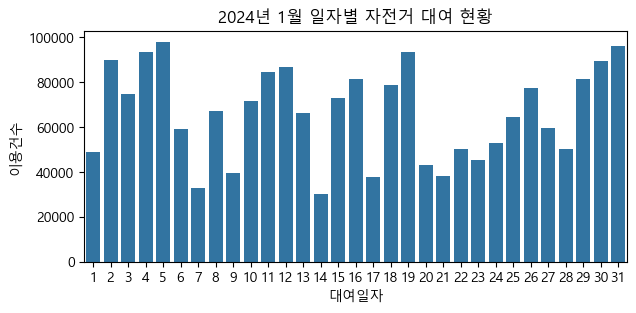

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

daily_ride_01=bikes.query('대여월==1').groupby('대여일자',as_index=False)[['자전거번호']].count().rename(columns={'자전거번호':'이용건수'}) # 해결!
plt.rc('font',family='Malgun Gothic')
plt.figure(figsize=(7,3))
sns.barplot(data=daily_ride_01,x='대여일자',y='이용건수')
plt.title('2024년 1월 일자별 자전거 대여 현황')

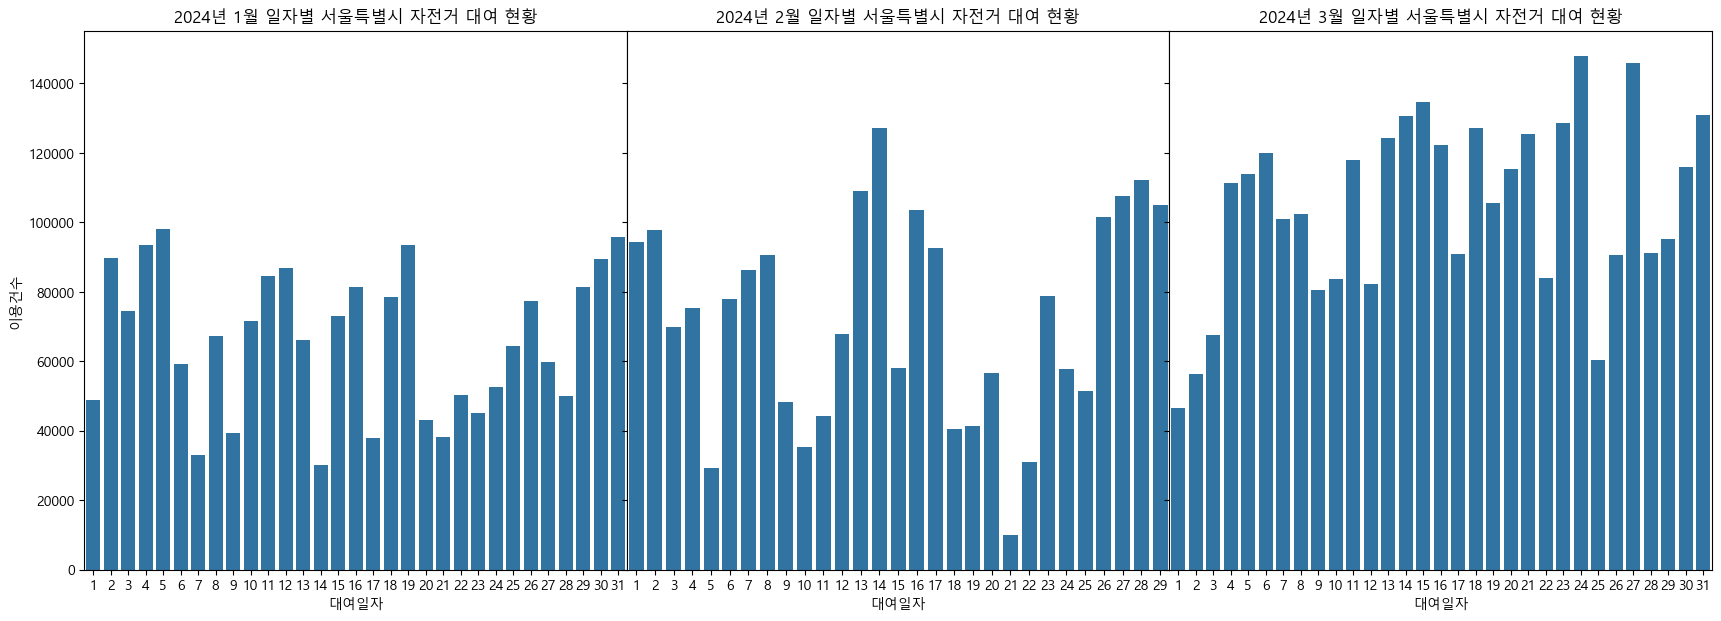

In [33]:
# 1, 2, 3월 한꺼번에 비교되게 만들기

fig,axes=plt.subplots(1,3,figsize=(21,7),sharey=True) # y축 높이 맞추기, x축 맞추기: sharex
plt.subplots_adjust(wspace=0) # 가로 간격 없애기, 세로 없애기: hspace

daily_ride_01=bikes.query('대여월==1').groupby('대여일자',as_index=False)[['자전거번호']].count().rename(columns={'자전거번호':'이용건수'})
daily_ride_02=bikes.query('대여월==2').groupby('대여일자',as_index=False)[['자전거번호']].count().rename(columns={'자전거번호':'이용건수'})
daily_ride_03=bikes.query('대여월==3').groupby('대여일자',as_index=False)[['자전거번호']].count().rename(columns={'자전거번호':'이용건수'})

sns.barplot(data=daily_ride_01,x='대여일자',y='이용건수',ax=axes[0])
axes[0].set_title('2024년 1월 일자별 서울특별시 자전거 대여 현황')

sns.barplot(data=daily_ride_02,x='대여일자',y='이용건수',ax=axes[1])
axes[1].set_title('2024년 2월 일자별 서울특별시 자전거 대여 현황')

sns.barplot(data=daily_ride_03,x='대여일자',y='이용건수',ax=axes[2])
axes[2].set_title('2024년 3월 일자별 서울특별시 자전거 대여 현황')

plt.show()

In [34]:
daily_ride_01.head()

,대여일자,이용건수
0,1,48927
1,2,89691
2,3,74474
3,4,93416
4,5,97979


In [35]:
daily_ride_02.head()

,대여일자,이용건수
0,1,94236
1,2,97692
2,3,69843
3,4,75398
4,5,29119


In [36]:
daily_ride_03.head()

,대여일자,이용건수
0,1,46525
1,2,56406
2,3,67584
3,4,111299
4,5,113837


In [37]:
bikes.columns

Index(['자전거번호', '대여일시', '대여 대여소번호', '대여 대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '생년', '성별', '이용자종류', '대여대여소ID',
       '반납대여소ID', '자전거구분', '대여일', '대여월', '대여일자', '대여시간대', '대여요일_n', '대여요일',
       '대여요일 주말구분'],
      dtype='object')

In [38]:
# 대여시간대별 따릉이 이용건수

hourly_ride=bikes.groupby('대여시간대',as_index=False)[['자전거번호']].count().rename(columns={'자전거번호':'이용건수'})
hourly_ride

,대여시간대,이용건수
0,0,145982
1,1,106044
2,2,72061
3,3,53001
4,4,44513
5,5,76185
6,6,163283
7,7,362664
8,8,572957
9,9,334557


In [39]:
# 요일별 따릉이 이용건수

weekday_ride=bikes.groupby('대여요일',as_index=False)[['자전거번호']].count().rename(columns={'자전거번호':'이용건수'})
weekday_ride

,대여요일,이용건수
0,금,1146668
1,목,1147832
2,수,1173864
3,월,977123
4,일,883904
5,토,987407
6,화,1088280


In [40]:
# 주말구분별

weekend_ride=bikes.groupby('대여요일 주말구분',as_index=False)[['자전거번호']].count().rename(columns={'자전거번호':'이용건수'})
weekend_ride

,대여요일 주말구분,이용건수
0,주말,1871311
1,평일,5533767


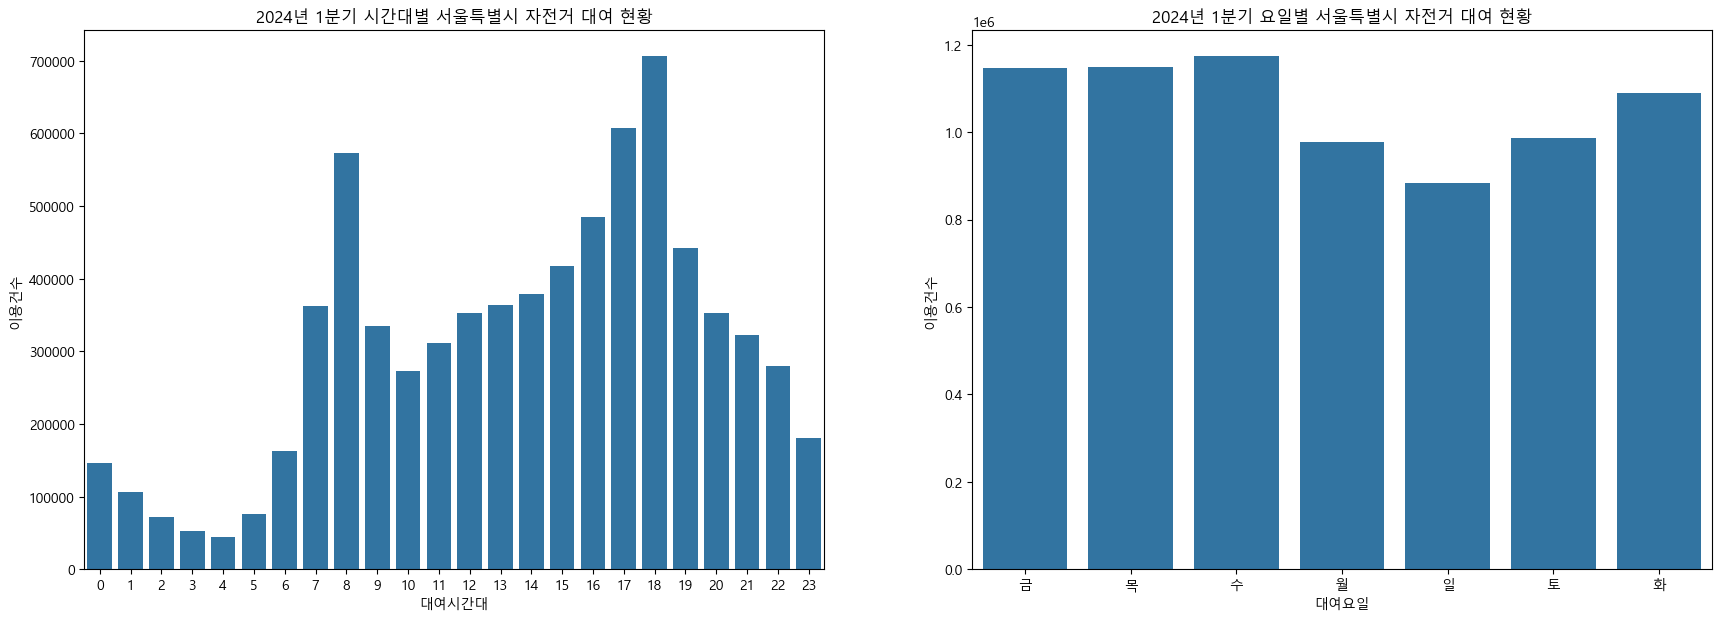

In [41]:
fig,axes=plt.subplots(1,2,figsize=(21,7))

sns.barplot(data=hourly_ride,x='대여시간대',y='이용건수',ax=axes[0])
axes[0].set_title('2024년 1분기 시간대별 서울특별시 자전거 대여 현황')

sns.barplot(data=weekday_ride,x='대여요일',y='이용건수',ax=axes[1])
axes[1].set_title('2024년 1분기 요일별 서울특별시 자전거 대여 현황')

plt.show()

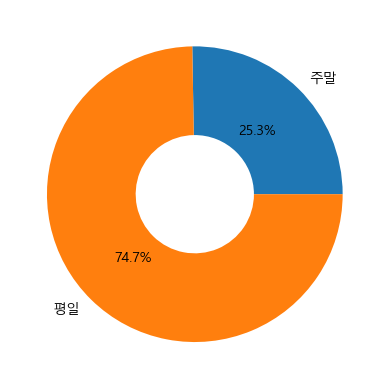

In [42]:
plt.pie(weekend_ride['이용건수'],labels=weekend_ride['대여요일 주말구분'],autopct="%.1f%%",wedgeprops={'width':0.6});

In [43]:
# 대여시간대별 & 요일별 이용건수 동시에 살펴보기

hourly_weekday_ride=bikes.groupby(['대여시간대','대여요일'],as_index=False)[['자전거번호']].count().rename(columns={'자전거번호':'이용건수'})
hourly_weekday_ride.head()

,대여시간대,대여요일,이용건수
0,0,금,23351
1,0,목,20715
2,0,수,20657
3,0,월,15891
4,0,일,23361


<Axes: xlabel='대여시간대', ylabel='이용건수'>

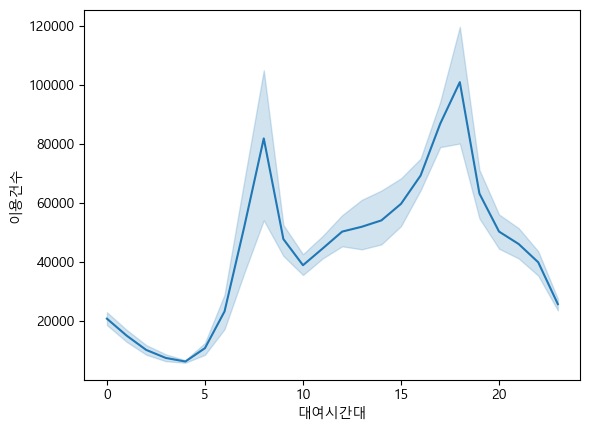

In [44]:
sns.lineplot(data=hourly_weekday_ride,x='대여시간대',y='이용건수')

<Axes: xlabel='대여시간대', ylabel='이용건수'>

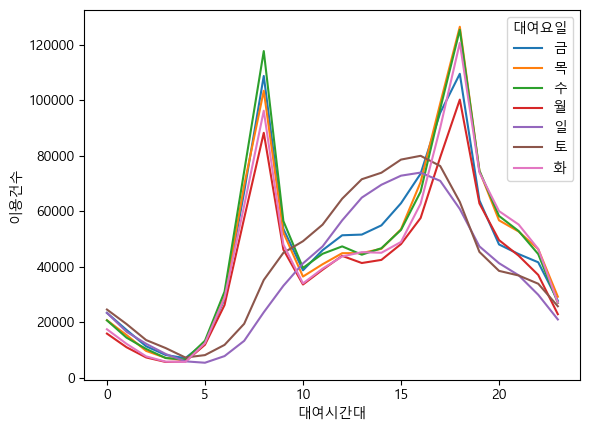

In [45]:
# 요일도 같이 체크하려면?

sns.lineplot(data=hourly_weekday_ride,x='대여시간대',y='이용건수',hue='대여요일')

In [46]:
# 좀 더 쉽게 해석하려면?: heatmap!
# 데이터셋을 pivot table 형식으로 만들어야!

hourly_weekday_ride2=bikes.pivot_table(index='대여시간대',columns='대여요일',values='자전거번호',aggfunc='count')
hourly_weekday_ride2

대여요일,금,목,수,월,일,토,화
대여시간대,,,,,,,
0,23351,20715,20657,15891,23361,24562,17445
1,17204,15369,14435,10968,16545,19326,12197
2,11316,9649,10355,7293,12211,13558,7679
3,8168,7143,7070,5661,8525,10661,5773
4,7037,6301,6533,5823,5884,7268,5667
5,12646,12380,13316,11864,5389,8138,12452
6,28336,29267,31027,26191,7786,11822,28854
7,66935,69323,74315,57457,13271,19417,61946
8,108701,103379,117672,88228,23574,35210,96193


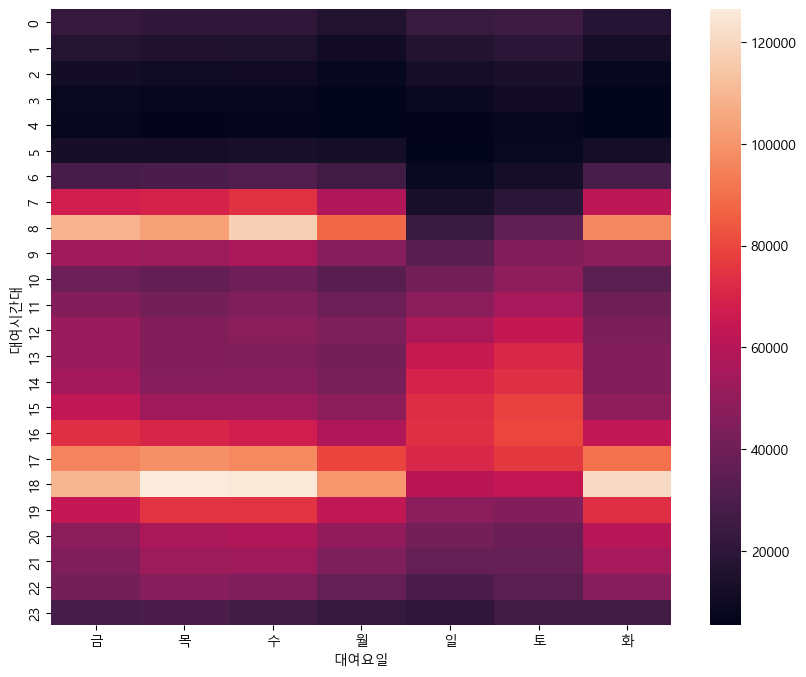

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(data=hourly_weekday_ride2);

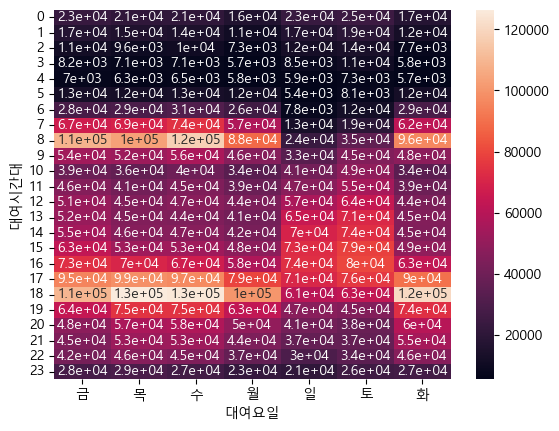

In [48]:
# 값 보이게 하기

sns.heatmap(data=hourly_weekday_ride2,annot=True);

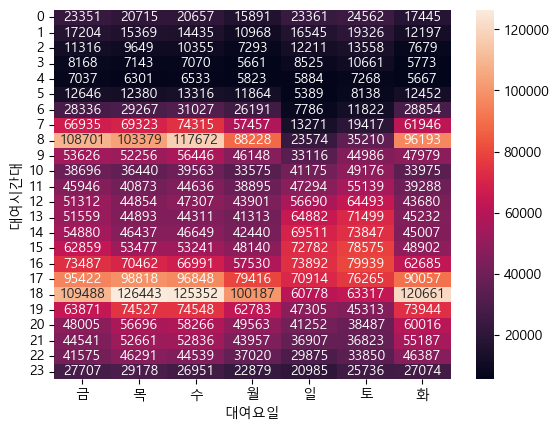

In [49]:
# 지수 말고 정수형으로 나오게 하려면?

sns.heatmap(data=hourly_weekday_ride2,annot=True,fmt='d');

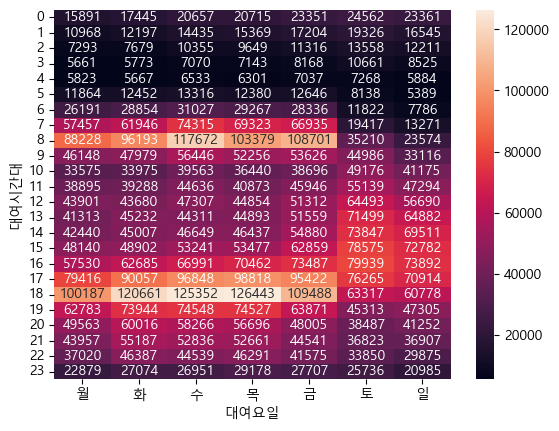

In [50]:
# 월화수목금토일 순으로 정렬하고 싶은데...

hourly_weekday_ride2=hourly_weekday_ride2.reindex(columns=['월','화','수','목','금','토','일'])
sns.heatmap(data=hourly_weekday_ride2,annot=True,fmt='d');

In [51]:
# groupby를 pivot table처럼 만들기!

hourly_weekday_ride3=bikes.groupby(['대여시간대','대여요일'])[['자전거번호']].count().rename(columns={'자전거번호':'이용건수'}).unstack()
hourly_weekday_ride3

이용건수                                              
대여요일        금       목       수       월      일      토       화
대여시간대                                                      
0       23351   20715   20657   15891  23361  24562   17445
1       17204   15369   14435   10968  16545  19326   12197
2       11316    9649   10355    7293  12211  13558    7679
3        8168    7143    7070    5661   8525  10661    5773
4        7037    6301    6533    5823   5884   7268    5667
5       12646   12380   13316   11864   5389   8138   12452
6       28336   29267   31027   26191   7786  11822   28854
7       66935   69323   74315   57457  13271  19417   61946
8      108701  103379  117672   88228  23574  35210   96193
9       53626   52256   56446   46148  33116  44986   47979
10      38696   36440   39563   33575  41175  49176   33975
11      45946   40873   44636   38895  47294  55139   39288
12      51312   44854   47307   43901  56690  64493   43680
13      51559   44893   44311   41313  64882  71499   45232
14      54880   46437   46649   42440  69511  73847   45007
15      62859   53477   53241   48140  72782  78575   48902
16      73487   70462   66991   57530  73892  79939   62685
17      95422   98818   96848   79416  70914  76265   90057
18     109488  126443  125352  100187  60778  63317  120661
19      63871   74527   74548   62783  47305  45313   73944
20      48005   56696   58266   49563  41252  38487   60016
21      44541   52661   52836   43957  36907  36823   55187
22      41575   46291   44539   37020  29875  33850   46387
23      27707   29178   26951   22879  20985  25736   27074

In [52]:
# 인기 있는 대여소 TOP 50!: 주말에는 어디가? 평일에는 어디가?

bikes.groupby(['대여 대여소번호','대여 대여소명','대여요일 주말구분'])[['자전거번호']].count().rename(columns={'자전거번호':'이용건수'})

이용건수
대여 대여소번호 대여 대여소명     대여요일 주말구분      
102      망원역 1번출구 앞  주말         1794
                     평일         4485
103      망원역 2번출구 앞  주말         1609
                     평일         3149
104      합정역 1번출구 앞  주말          976
...                              ...
6172     가양5단지아파트    주말          156
                     평일          514
6173     서울자동차운전전문학원 주말           31
                     평일           76
9980     AS센터        평일           31

[5472 rows x 1 columns]

In [53]:
bikes_weekend=bikes.groupby(['대여 대여소번호','대여 대여소명','대여요일 주말구분'])['자전거번호'].count().unstack() # 여기엔 대괄호 2개 금지!
bikes_weekend

,대여요일 주말구분,주말,평일
대여 대여소번호,대여 대여소명,,
102,망원역 1번출구 앞,1794.0,4485.0
103,망원역 2번출구 앞,1609.0,3149.0
104,합정역 1번출구 앞,976.0,2826.0
105,합정역 5번출구 앞,740.0,1662.0
106,합정역 7번출구 앞,1975.0,2915.0
...,...,...,...
6055,한국경제,145.0,748.0
6171,월드빌딩 앞,626.0,1760.0
6172,가양5단지아파트,156.0,514.0


In [54]:
weekend50=bikes_weekend.sort_values('주말',ascending=False).head(50)
weekend50

,대여요일 주말구분,주말,평일
대여 대여소번호,대여 대여소명,,
4217,한강공원 망원나들목,9011.0,8691.0
502,자양(뚝섬한강공원)역 1번출구 앞,7992.0,11407.0
2715,마곡나루역 2번 출구,6274.0,26543.0
1210,롯데월드타워(잠실역2번출구 쪽),5606.0,13241.0
207,여의나루역 1번출구 앞,5410.0,8141.0
2102,봉림교 교통섬,4907.0,9522.0
1153,"발산역 1번, 9번 인근 대여소",4410.0,14136.0
2622,올림픽공원역 3번출구,4095.0,7354.0
3533,건대입구역 사거리(롯데백화점),3872.0,8539.0


In [55]:
weekend50=bikes_weekend.sort_values('주말',ascending=False).head(50).reset_index()
weekend50

대여요일 주말구분,대여 대여소번호,대여 대여소명,주말,평일
0,4217,한강공원 망원나들목,9011.0,8691.0
1,502,자양(뚝섬한강공원)역 1번출구 앞,7992.0,11407.0
2,2715,마곡나루역 2번 출구,6274.0,26543.0
3,1210,롯데월드타워(잠실역2번출구 쪽),5606.0,13241.0
4,207,여의나루역 1번출구 앞,5410.0,8141.0
5,2102,봉림교 교통섬,4907.0,9522.0
6,1153,"발산역 1번, 9번 인근 대여소",4410.0,14136.0
7,2622,올림픽공원역 3번출구,4095.0,7354.0
8,3533,건대입구역 사거리(롯데백화점),3872.0,8539.0
9,2608,송파구청,3836.0,9732.0


In [56]:
bikes_weekend.sort_values('평일',ascending=False).head(50)

,대여요일 주말구분,주말,평일
대여 대여소번호,대여 대여소명,,
2715,마곡나루역 2번 출구,6274.0,26543.0
2701,마곡나루역 5번출구 뒤편,2881.0,18887.0
2728,마곡나루역 3번 출구,3198.0,16557.0
1153,"발산역 1번, 9번 인근 대여소",4410.0,14136.0
230,영등포구청역 1번출구,3733.0,13572.0
1210,롯데월드타워(잠실역2번출구 쪽),5606.0,13241.0
1911,구로디지털단지역 앞,3332.0,11683.0
502,자양(뚝섬한강공원)역 1번출구 앞,7992.0,11407.0
5052,마곡역 7번출구,2165.0,10307.0


In [57]:
bike_shop=pd.read_csv('files\공공자전거 대여소 정보.csv',encoding='cp949')
bike_shop

,대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978332
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100
...,...,...,...,...,...,...
2761,4954,신명초등학교 건너편,강동구,강동구 천호대로201길,37.540043,127.150742
2762,4956,암사역사공원역 1번출구,강동구,강동구 고덕로27길 36,37.557568,127.140160
2763,4957,신명초교 교차로,강동구,강동구 길동 158-8,37.540436,127.148399
2764,4958,고덕래미안힐스테이트 아파트 211동,강동구,강동구 고덕동 490,37.559494,127.145126


In [58]:
# merge하고 cluster해서 상위 50개 지도 뿌리기
%pip install folium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [59]:
weekend50.head()

대여요일 주말구분,대여 대여소번호,대여 대여소명,주말,평일
0,4217,한강공원 망원나들목,9011.0,8691.0
1,502,자양(뚝섬한강공원)역 1번출구 앞,7992.0,11407.0
2,2715,마곡나루역 2번 출구,6274.0,26543.0
3,1210,롯데월드타워(잠실역2번출구 쪽),5606.0,13241.0
4,207,여의나루역 1번출구 앞,5410.0,8141.0


In [60]:
bike_shop.head()

,대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978332
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100


In [61]:
bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여대여소ID,반납대여소ID,자전거구분,대여일,대여월,대여일자,대여시간대,대여요일_n,대여요일,대여요일 주말구분
0,SPB-46712,2024-01-01 00:04:10,4804,동서울농협 앞,0,2024-01-01 00:05:13,01416,상봉역 3번출구,0,1,...,ST-2630,ST-850,일반자전거,2024-01-01 00:04:10,1,1,0,0,월,평일
1,SPB-35089,2024-01-01 00:00:10,4169,신대방삼거리,0,2024-01-01 00:06:23,00251,서울지방병무청 버스정류장,0,6,...,ST-2654,ST-299,일반자전거,2024-01-01 00:00:10,1,1,0,0,월,평일
2,SPB-36386,2024-01-01 00:03:13,540,군자역 7번출구 베스트샵 앞,0,2024-01-01 00:06:33,03509,세종사이버대학교,0,3,...,ST-253,ST-1194,일반자전거,2024-01-01 00:03:13,1,1,0,0,월,평일
3,SPB-61278,2024-01-01 00:02:42,1139,용문사 버스정류장,0,2024-01-01 00:07:24,00701,목동사거리 부근,0,4,...,ST-533,ST-309,일반자전거,2024-01-01 00:02:42,1,1,0,0,월,평일
4,SPB-36848,2024-01-01 00:03:02,3416,동묘앞역 6번출구,0,2024-01-01 00:07:33,00346,맥스타일 앞,0,4,...,ST-1813,ST-162,일반자전거,2024-01-01 00:03:02,1,1,0,0,월,평일


In [62]:
# weekend50과 bike_shop의 대여소 번호 일치하는 것끼리 합치기

weekend50_total=pd.merge(weekend50,bike_shop,left_on='대여 대여소번호',right_on='대여소번호')
weekend50_total

,대여 대여소번호,대여 대여소명,주말,평일,대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도
0,4217,한강공원 망원나들목,9011.0,8691.0,4217,한강공원 망원나들목,마포구,마포구 망원동 462-8,37.555576,126.896889
1,502,자양(뚝섬한강공원)역 1번출구 앞,7992.0,11407.0,502,뚝섬유원지역 1번출구 앞,광진구,서울특별시 광진구 능동로 10 뚝섬유원지역 1번출구 앞,37.531860,127.067192
2,2715,마곡나루역 2번 출구,6274.0,26543.0,2715,마곡나루역 2번 출구,강서구,강서구 마곡중앙5로 6,37.566925,126.827438
3,1210,롯데월드타워(잠실역2번출구 쪽),5606.0,13241.0,1210,롯데월드타워(잠실역2번출구 쪽),송파구,서울특별시 송파구 올림픽로 293-19,37.513126,127.100960
4,207,여의나루역 1번출구 앞,5410.0,8141.0,207,여의나루역 1번출구 앞,영등포구,서울특별시 영등포구 여의동로 지하343,37.527157,126.931900
5,2102,봉림교 교통섬,4907.0,9522.0,2102,봉림교 교통섬,관악구,서울특별시 관악구 관천로 52,37.484085,126.926888
6,1153,"발산역 1번, 9번 인근 대여소",4410.0,14136.0,1153,"발산역 1번, 9번 인근 대여소",강서구,서울특별시 강서구 공항대로 281,37.558949,126.837174
7,2622,올림픽공원역 3번출구,4095.0,7354.0,2622,올림픽공원역 3번출구,송파구,송파구 방이동 89-28,37.516258,127.130592
8,3533,건대입구역 사거리(롯데백화점),3872.0,8539.0,3533,건대입구역 사거리(롯데백화점),광진구,서울특별시 광진구 능동로 92 건대입구역 사거리(롯데백화점),37.539139,127.070618
9,2608,송파구청,3836.0,9732.0,2608,송파구청,송파구,송파구 올림픽로 326,37.515053,127.106270


In [63]:
weekend50_total.tail()

,대여 대여소번호,대여 대여소명,주말,평일,대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도
45,4540,목동역 3번 출구,2600.0,7856.0,4540,목동역 3번 출구,양천구,양천구 목동 926-3,37.526531,126.864456
46,1601,석계역 문화광장 내 자전거 보관소,2587.0,7317.0,1601,석계역 문화광장 내 자전거 보관소,노원구,서울특별시 노원구 화랑로 331,37.615181,127.064644
47,4029,청소년수련관 후문,2585.0,7143.0,4029,청소년수련관 후문,노원구,서울특별시 노원구 노원구 중계동 504-2,37.639664,127.060417
48,113,홍대입구역 2번출구 앞,2582.0,8910.0,113,홍대입구역 2번출구 앞,마포구,서울특별시 마포구 양화로 165,37.557438,126.923821
49,3798,그랜드아이파크아파트 앞,2565.0,9027.0,3798,그랜드아이파크아파트 앞,강서구,,37.555107,126.851547


<Axes: ylabel='자치구'>

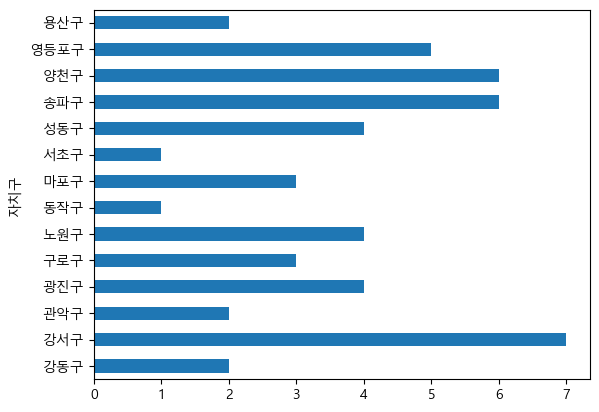

In [64]:
# 어느 자치구가 가장 많은지

weekend50_tot=weekend50_total.groupby('자치구')['대여 대여소번호'].count()
weekend50_tot.plot(kind='barh')

In [65]:
weekend50_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대여 대여소번호   50 non-null     int64  
 1   대여 대여소명    50 non-null     object 
 2   주말         50 non-null     float64
 3   평일         50 non-null     float64
 4   대여소번호      50 non-null     int64  
 5   보관소(대여소)명  50 non-null     object 
 6   자치구        50 non-null     object 
 7   상세주소       50 non-null     object 
 8   위도         50 non-null     float64
 9   경도         50 non-null     float64
dtypes: float64(4), int64(2), object(4)
memory usage: 4.0+ KB


In [66]:
import folium

In [67]:
map=folium.Map(location=[weekend50_total['위도'].mean(),weekend50_total['경도'].mean()],
               zoom_start=12,width=800,height=500)
map

In [68]:
from folium.plugins import MarkerCluster

In [69]:
marker_c=MarkerCluster().add_to(map)
for i in weekend50_total.index:
    sub_lat=weekend50_total.loc[i,'위도']
    sub_lon=weekend50_total.loc[i,'경도']
    sub_name=weekend50_total.loc[i,'대여 대여소명']

    shop=[sub_lat,sub_lon]

    folium.Marker(location=shop,popup=sub_name,icon=folium.Icon(color='red',icon='star')).add_to(marker_c)

map

In [70]:
map.save('map.html')